Statistiques Exploratoires

Analyse descriptive des variables numériques et qualitatives

In [3]:
# Statistiques descriptives

import pandas as pd
import numpy as np

link = 'https://raw.githubusercontent.com/QuantikDataStudio/dataset/main/kickstarter.csv'

data = pd.read_csv(link, on_bad_lines='skip', index_col = 0)
data.head()

name        category  \
ID                                                                              
1000002330                    The Songs of Adelaide & Abullah          Poetry   
1000003930      Greeting From Earth: ZGAC Arts Capsule For ET  Narrative Film   
1000004038                                     Where is Hank?  Narrative Film   
1000007540  ToshiCapital Rekordz Needs Help to Complete Album           Music   
1000011046  Community Film Project: The Art of Neighborhoo...    Film & Video   

           main_category currency    deadline      goal             launched  \
ID                                                                             
1000002330    Publishing      GBP  2015-10-09   1000.00  2015-08-11 12:12:28   
1000003930  Film & Video      USD  2017-11-01  30000.00  2017-09-02 04:43:57   
1000004038  Film & Video      USD  2013-02-26  45000.00  2013-01-12 00:20:50   
1000007540         Music      USD  2012-04-16   5000.00  2012-03-17 03:24:11   
1000011046  Film & Video      USD  2015-08-29  19500.00  2015-07-04 08:35:03   

            pledged     state backers country  usd pledged usd_pledged_real  \
ID                                                                            
1000002330     0.00    failed       0      GB          0.0             0.00   
1000003930  2421.00    failed      15      US        100.0          2421.00   
1000004038   220.00    failed       3      US        220.0           220.00   
1000007540     1.00    failed       1      US          1.0             1.00   
1000011046  1283.00  canceled      14      US       1283.0          1283.00   

           usd_goal_real;;  
ID                          
1000002330       1533.95;;  
1000003930      30000.00;;  
1000004038      45000.00;;  
1000007540       5000.00;;  
1000011046      19500.00;;

In [4]:
columns_to_drop = ['usd pledged', 'usd_pledged_real', 'usd_goal_real;;']
data = data.drop(columns=columns_to_drop)

In [5]:
data = data.dropna()

In [6]:
data = data[~data['goal'].str.contains('-')].copy()
data['goal'] = data['goal'].astype(float)

In [7]:
data['pledged'] = data['pledged'].astype(float)
data['backers'] = data['backers'].astype(int)

In [8]:
masque = data['goal'] < 600000
data = data.loc[masque].copy()

In [10]:
data.state.unique()

array(['failed', 'canceled', 'successful', 'live', 'suspended'],
      dtype=object)

In [11]:
masque = (data['state'] == 'failed') | (data['state'] == 'successful')
data = data.loc[masque].copy()
data = data.head(20000)

In [12]:

data.info();
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 1000002330 to 113204057
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           20000 non-null  object 
 1   category       20000 non-null  object 
 2   main_category  20000 non-null  object 
 3   currency       20000 non-null  object 
 4   deadline       20000 non-null  object 
 5   goal           20000 non-null  float64
 6   launched       20000 non-null  object 
 7   pledged        20000 non-null  float64
 8   state          20000 non-null  object 
 9   backers        20000 non-null  int64  
 10  country        20000 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 1.8+ MB


name        category  \
ID                                                                              
1000002330                    The Songs of Adelaide & Abullah          Poetry   
1000003930      Greeting From Earth: ZGAC Arts Capsule For ET  Narrative Film   
1000004038                                     Where is Hank?  Narrative Film   
1000007540  ToshiCapital Rekordz Needs Help to Complete Album           Music   
1000014025                               Monarch Espresso Bar     Restaurants   

           main_category currency    deadline     goal             launched  \
ID                                                                            
1000002330    Publishing      GBP  2015-10-09   1000.0  2015-08-11 12:12:28   
1000003930  Film & Video      USD  2017-11-01  30000.0  2017-09-02 04:43:57   
1000004038  Film & Video      USD  2013-02-26  45000.0  2013-01-12 00:20:50   
1000007540         Music      USD  2012-04-16   5000.0  2012-03-17 03:24:11   
1000014025          Food      USD  2016-04-01  50000.0  2016-02-26 13:38:27   

            pledged       state  backers country  
ID                                                
1000002330      0.0      failed        0      GB  
1000003930   2421.0      failed       15      US  
1000004038    220.0      failed        3      US  
1000007540      1.0      failed        1      US  
1000014025  52375.0  successful      224      US

In [13]:
# Déterminer les variables numériques et les stocker dans un tableau num_data.
num_data = data.select_dtypes(include=['int64', 'float64'])
num_data

goal   pledged  backers
ID                                    
1000002330   1000.0       0.0        0
1000003930  30000.0    2421.0       15
1000004038  45000.0     220.0        3
1000007540   5000.0       1.0        1
1000014025  50000.0   52375.0      224
...             ...       ...      ...
1132019813   4000.0    4550.0       55
1132026580   1500.0      15.0        1
1132035662  35000.0   35912.0      367
1132037267  20000.0       6.0        2
113204057   50000.0  117192.0      980

[20000 rows x 3 columns]

# EDA : MOYENNE, MEDIANE ET QUANTILES

Il existe certaines statistiques descriptives simples à calculer qui permettent d'obtenir une meilleure compréhension des données quantitatives. C'est ce qu'on appelle les indicateurs de position. Ils sont au nombre de cinq :

moyenne,
médiane,
quantiles,
min,
max.
La moyenne permet de résumer facilement une liste de données numériques en une seule valeur.

Calculer la moyenne de chaque variable contenue dans num_data et les stocker dans un DataFrame stats avec comme unique colonne moyenne.
Comparer la moyenne des collectes (pledged) avec celle des objectifs fixés (goal). Que constatez-vous ?
Pour la création du DataFrame stats, on pourra utiliser pd.DataFrame et l'attribut columns.

Pour le calcul des moyennes, on pourra s'aider de pandas.DataFrame.mean().

In [14]:
#Calcul de la moyenne
num_data.mean()

goal       17944.893169
pledged    10514.226824
backers      116.169950
dtype: float64

In [15]:
# Calculer la moyenne de chaque variable contenue dans num_data et les stocker dans un DataFrame stats avec comme unique colonne moyenne
stats = pd.DataFrame(num_data.mean(), columns=['moyenne'])

#Je fais un arrondi decimal a 2 chiffres 
stats.round(2)

moyenne
goal     17944.89
pledged  10514.23
backers    116.17

In [16]:
# Calculer la médiane de chaque variable contenue dans num_data et ajouter une colonne median à stats
# pd.DataFrame(num_data.median(), columns=['median'])
# Je vais faire la meme chose mais je vais merge les 2 dataFrames("Moyenne" et "Median")
pd.merge(stats, pd.DataFrame(num_data.median(), columns=['median']), left_index=True, right_index=True)

moyenne  median
goal     17944.893169  5000.0
pledged  10514.226824   757.0
backers    116.169950    15.0

In [17]:
#Ou je peux faire comme ceci

stats['median']= num_data.median()
stats['median']
stats

moyenne  median
goal     17944.893169  5000.0
pledged  10514.226824   757.0
backers    116.169950    15.0

In [18]:
# Créer une variable mean_med_diff correspondant à la valeur absolue de la différence entre moyenne et médiane.
stats['mean_med_diff'] = abs(stats['moyenne'] - stats['median'])
stats.round(2)

moyenne  median  mean_med_diff
goal     17944.89  5000.0       12944.89
pledged  10514.23   757.0        9757.23
backers    116.17    15.0         101.17

<Axes: >

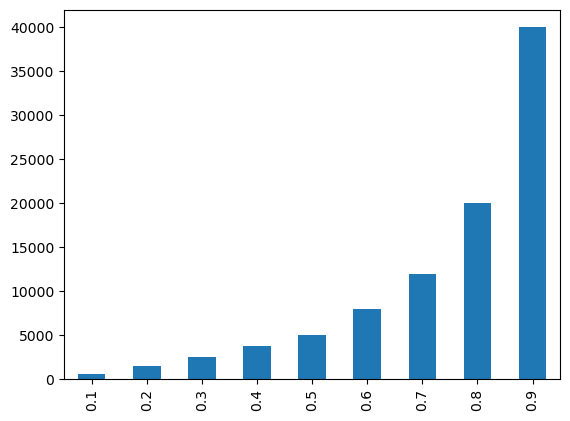

In [19]:
# Déterminer les quantiles de goal.
# Pour déterminer les quantiles on pourra s'aider depandas.DataFrame.quantile(q = [0.25,0.5,0.75])
num_data['goal'].quantile(q=[_/100 for _ in range (10, 100, 10)]).plot(kind="bar")

In [20]:
num_data.quantile(q=[0.25, 0.5, 0.75])

goal  pledged  backers
0.25   2000.0    50.00      2.0
0.50   5000.0   757.00     15.0
0.75  15000.0  4652.75     62.0

In [21]:
# Ajouter au tableau stats 3 colonnes q1, q2 *et *q3 renseignant respectivement le premier, deuxième et troisième quantile de chaque variable numérique.
stats[['q1', 'q2', 'q3']] = num_data.quantile(q=[0.25, 0.5, 0.75]).transpose()
stats

moyenne  median  mean_med_diff      q1      q2        q3
goal     17944.893169  5000.0   12944.893169  2000.0  5000.0  15000.00
pledged  10514.226824   757.0    9757.226824    50.0   757.0   4652.75
backers    116.169950    15.0     101.169950     2.0    15.0     62.00

In [22]:
# Ajouter au tableau stats 3 colonnes min, max et min_max_diff renseignant le min,le max et la différence des deux.
stats['min'] = num_data.min()
stats['max'] = num_data.max()
stats['min_max_diff'] = stats['max'] = stats['min']
stats

moyenne  median  mean_med_diff      q1      q2        q3  min  \
goal     17944.893169  5000.0   12944.893169  2000.0  5000.0  15000.00  1.0   
pledged  10514.226824   757.0    9757.226824    50.0   757.0   4652.75  0.0   
backers    116.169950    15.0     101.169950     2.0    15.0     62.00  0.0   

         max  min_max_diff  
goal     1.0           1.0  
pledged  0.0           0.0  
backers  0.0           0.0

ECART TYPE ET OUTLIERS
Deux derniers indicateurs nous permettent d'avoir un bon aperçu : la variance et l'écart-type.
Ils font partie de la famille des indicateurs de dispersion :

La variance, qui mesure la dispersion autour de la moyenne, c'est à dire à quel point les valeurs présentes dans une liste numérique sont écartées de la moyenne.

L'écart type, qui se définit mathématiquement comme la racine carrée de la variance. De par sa construction, l’écart type est également une mesure de la dispersion des valeurs.

  On peut calculer facilement l'écart type d'une variable en utilisant pandas.Series.std()

Calculer l'écart type de la variable backers.

Afficher l'intervalle moyenne +/- ecart type de la variable backers.

In [23]:
ecart_type = num_data['backers'].std()

intervalle = [num_data['backers'].mean() - ecart_type, num_data['backers'].mean() + ecart_type]
print(intervalle)

[np.float64(-860.1421576446724), np.float64(1092.4820576446723)]


On peut tout à fait tronquer l'intervalle à 0. Le nombre de backers est toujours positif.

Ajouter une nouvelle colonne intitulée backers_in à num_data contenant 1 si la valeur de backers appartiennent à l'intervalle calculé précédemment et 0 sinon.
Pour déterminer les valeurs qui appartiennent à l'intervalle calculé précédemment, on pourra s'aider de pandas.Series.between(int1,int2).astype(int).

Pour afficher les proportions on pourra s'aider de pandas.Series.value_counts(normalize = True).

In [25]:
num_data['backers_in'] = num_data['backers'].between(intervalle[0], intervalle[1]).astype(int)

num_data['backers_in'].value_counts(normalize=True)

num_data.head(10)

goal  pledged  backers  backers_in
ID                                               
1000002330   1000.0      0.0        1           1
1000003930  30000.0   2421.0        1           1
1000004038  45000.0    220.0        1           1
1000007540   5000.0      1.0        1           1
1000014025  50000.0  52375.0        1           1
1000023410   1000.0   1205.0        1           1
1000030581  25000.0    453.0        1           1
100004721    2500.0      0.0        1           1
100005484   12500.0  12700.0        1           1
1000055792   5000.0      0.0        1           1

<Axes: xlabel='backers_20'>

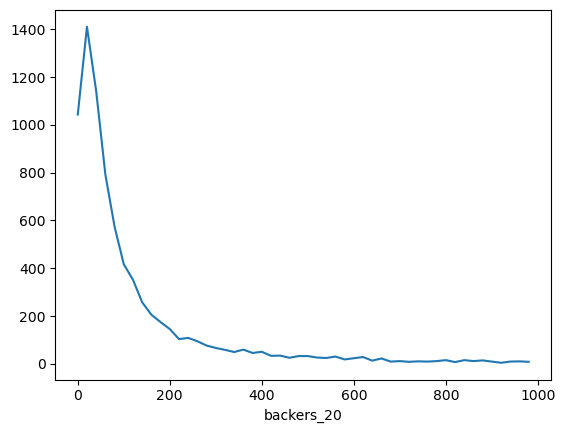

In [35]:
# Filter data based on 'successful' state and backers less than 1000
temp = data[(data.state == "successful") & (data.backers < 1000)].copy()

# Create 'backers_20' by grouping backers in chunks of 20
temp['backers_20'] = 20 * (temp.backers // 20)

# Plot the groupings of backers
temp.groupby("backers_20").size().plot()


LES VARIABLES QUANTITATIVES
L'analyse des variables qualitatives est une étape importante dans la compréhension des données.
Elles sont souvent plus difficiles à manipuler et il est important d'observer leur relation avec les variables numériques.
Elles livrent souvent des informations précieuses sur l'interaction entre les variables dans le jeu de données.

L'objectif de ce module est d'arriver à déterminer les modalités d'une variable qualitative et l'importance de chacune.
Ce module vous permettra également de vous familiariser avec des méthodes simples de gestion de données.

In [36]:
# Lancer la cellule suivante pour reprendre votre analyse de KickStarter

import pandas as pd
import numpy as np

link = 'https://raw.githubusercontent.com/QuantikDataStudio/dataset/main/kickstarter.csv'

data = pd.read_csv(link, on_bad_lines='skip', index_col = 0)
columns_to_drop = ['usd pledged', 'usd_pledged_real', 'usd_goal_real;;']
data = data.drop(columns=columns_to_drop)
data = data.dropna()
data = data[~data['goal'].str.contains('-')]
data['goal'] = data['goal'].astype(float)
data['pledged'] = data['pledged'].astype(float)
data['backers'] = data['backers'].astype(int)
values_to_remove = ['canceled', 'live', 'suspended']
data = data[~data['state'].isin(values_to_remove)]
data = data.head(20000)
masque = data['goal'] < 600000
data = data.loc[masque]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19882 entries, 1000002330 to 1131376350
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           19882 non-null  object 
 1   category       19882 non-null  object 
 2   main_category  19882 non-null  object 
 3   currency       19882 non-null  object 
 4   deadline       19882 non-null  object 
 5   goal           19882 non-null  float64
 6   launched       19882 non-null  object 
 7   pledged        19882 non-null  float64
 8   state          19882 non-null  object 
 9   backers        19882 non-null  int64  
 10  country        19882 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 1.8+ MB


In [38]:
# Déterminer les variables catégorielles et les stocker dans un tableau cat_data.
#   On pourra s'aider de la fonction pandas.DataFrame.select_dtypes() et de l'attribut include auquel on renseignera une liste du ou des type(s) qu'on souhaite garder (ici 'O')

cat_data = data.select_dtypes(include= 'O')
cat_data.head(5)

name        category  \
ID                                                                              
1000002330                    The Songs of Adelaide & Abullah          Poetry   
1000003930      Greeting From Earth: ZGAC Arts Capsule For ET  Narrative Film   
1000004038                                     Where is Hank?  Narrative Film   
1000007540  ToshiCapital Rekordz Needs Help to Complete Album           Music   
1000014025                               Monarch Espresso Bar     Restaurants   

           main_category currency    deadline             launched  \
ID                                                                   
1000002330    Publishing      GBP  2015-10-09  2015-08-11 12:12:28   
1000003930  Film & Video      USD  2017-11-01  2017-09-02 04:43:57   
1000004038  Film & Video      USD  2013-02-26  2013-01-12 00:20:50   
1000007540         Music      USD  2012-04-16  2012-03-17 03:24:11   
1000014025          Food      USD  2016-04-01  2016-02-26 13:38:27   

                 state country  
ID                              
1000002330      failed      GB  
1000003930      failed      US  
1000004038      failed      US  
1000007540      failed      US  
1000014025  successful      US

L'analyse descriptive des variables qualitatives fait appel à d'autres outils de pandas.
Une première question qu'on doit se poser quand on fait face à ce type de données est : Quelles sont les modalités de chaque variable et comment se répartissent elles ?

Afficher les modalités de la variable main_category avec leurs fréquences respectives.

Quelle est la variable la plus fréquente ?

  On pourra s'aider de pandas.Series.value_counts().

  value_counts ne s'utilise pas sur des objets de type DataFrame

In [40]:
cat_data['main_category'].value_counts()

main_category
Film & Video    3365
Music           2519
Publishing      2087
Games           1850
Technology      1674
Art             1612
Design          1483
Food            1340
Fashion         1191
Comics           622
Photography      611
Theater          581
Crafts           498
Journalism       241
Dance            208
Name: count, dtype: int64

value_counts est couramment utilisé pour visualiser très rapidement les modalités d'une variable qualitative.
On peut également retrouver très facilement la modalité la plus fréquente d'une variable qualitative : la méthode mode permet de récupérer l'élément le plus fréquent à l'intérieur d'une pandas.Series.

Utiliser la méthode mode pour récupérer la modalité la plus fréquente de main_category.

Vérifier que cela correspond bien avec le value_counts exécuté précédemment.

In [41]:
#  mode() permet d'atteindre la categorie la plus represente parm les categories d'une colonne
cat_data['main_category'].mode()

0    Film & Video
Name: main_category, dtype: object

Dans ce jeu de données, nous disposons d'une variable binaire state qui renseigne sur la réussite ou l'échec de la collecte.
Ces variables sont généralement très intéressantes à étudier et livrent des informations précieuses sur les jeux de données. Il est important de bien les identifier et d'étudier dans un premier temps la fréquence des modalités.

Afficher les fréquences des modalités de la variable state.

In [43]:
cat_data['state'].value_counts(normalize=True)

state
failed        0.594457
successful    0.405543
Name: proportion, dtype: float64

On constate que 60% des collectes ont échouées.
Ce chiffre a peu d'intérêt si on ne le met pas en perspective avec le montant des objectifs fixés.
L'objectif est de faire une sorte de cartographie : 60% des collectes ont échoué mais quelles collectes sont concernées ? Les grosses ? Les petites ? Les deux ?

Pour avoir une première idée, il est nécessaire de se munir du jeu de données complet data et d'utiliser les outils groupby et agg qui s'utilisent aussi bien sur les DataFrames que sur les Series.

Tout d'abord dans une nouvelle variable goal_classes, découpez les montants cibles (goal) en 4 classes distinctes avec pour labels 0, 1, 2, 3 selon les 3 quantiles de la nouvelle variable créée.
  Il est fortement conseillé d'utiliser pandas.qcut() .

In [45]:
data['goal_classes'] = pd.qcut(data['goal'], q=4, labels=[0,1,2,3])
data.head()

name        category  \
ID                                                                              
1000002330                    The Songs of Adelaide & Abullah          Poetry   
1000003930      Greeting From Earth: ZGAC Arts Capsule For ET  Narrative Film   
1000004038                                     Where is Hank?  Narrative Film   
1000007540  ToshiCapital Rekordz Needs Help to Complete Album           Music   
1000014025                               Monarch Espresso Bar     Restaurants   

           main_category currency    deadline     goal             launched  \
ID                                                                            
1000002330    Publishing      GBP  2015-10-09   1000.0  2015-08-11 12:12:28   
1000003930  Film & Video      USD  2017-11-01  30000.0  2017-09-02 04:43:57   
1000004038  Film & Video      USD  2013-02-26  45000.0  2013-01-12 00:20:50   
1000007540         Music      USD  2012-04-16   5000.0  2012-03-17 03:24:11   
1000014025          Food      USD  2016-04-01  50000.0  2016-02-26 13:38:27   

            pledged       state  backers country goal_classes  
ID                                                             
1000002330      0.0      failed        0      GB            0  
1000003930   2421.0      failed       15      US            3  
1000004038    220.0      failed        3      US            3  
1000007540      1.0      failed        1      US            1  
1000014025  52375.0  successful      224      US            3

En utilisant groupby et agg, stocker dans state_summary le nombre de projets en fonction des variables goal_classes et state.
  Exemple d'utilisation : df.groupby(['Age','sex']).size().

In [48]:
state_summary = data.groupby(['goal_classes', 'state']).size() / data.groupby('goal_classes').size()
state_summary

C:\Users\Brice Daleu\AppData\Local\Temp\ipykernel_2244\2723004165.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  state_summary = data.groupby(['goal_classes', 'state']).size() / data.groupby('goal_classes').size()
C:\Users\Brice Daleu\AppData\Local\Temp\ipykernel_2244\2723004165.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  state_summary = data.groupby(['goal_classes', 'state']).size() / data.groupby('goal_classes').size()


goal_classes  state     
0             failed        0.483732
              successful    0.516268
1             failed        0.561977
              successful    0.438023
2             failed        0.602881
              successful    0.397119
3             failed        0.750374
              successful    0.249626
dtype: float64

Ajouter à state_summary l'information relative au champ backers.

In [51]:
backers_summary = data.groupby(['goal_classes', 'state']).agg({"backers": "mean"})

backers_summary.head()

C:\Users\Brice Daleu\AppData\Local\Temp\ipykernel_2244\2611318297.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  backers_summary = data.groupby(['goal_classes', 'state']).agg({"backers": "mean"})


backers
goal_classes state                 
0            failed        3.952434
             successful   51.481546
1            failed        8.514158
             successful  123.885277
2            failed       15.953584

In [53]:
pd.merge(state_summary.rename("state_percentage"), backers_summary,left_index=True, right_index=True)

state_percentage     backers
goal_classes state                                   
0            failed              0.483732    3.952434
             successful          0.516268   51.481546
1            failed              0.561977    8.514158
             successful          0.438023  123.885277
2            failed              0.602881   15.953584
             successful          0.397119  328.988083
3            failed              0.750374   27.540694
             successful          0.249626  938.322498

De manière purement analytique, nous avons décelé une information importante pour réussir son objectif de cagnotte : statistiquement, il semble qu'il ne faille pas fixer un objectif trop élevé à atteindre. Également, on remarquera que les campagnes qui sont un succès semblent réunir un nombre plus important de contributeurs.

On peut poser une question légitime : Peut-on avoir une idée du montant objectif (goal) à fixer pour optimiser ses chances de réussir ?

Reprendre data et toujours en utilisant groupby,agg exprimer les montants cibles (goal) médians, moyens, minimum et maximum en fonction de state dans un DataFrame target_goal.

In [54]:
data.groupby("state").agg({"goal": ["median", "mean", "min", "max"]})

goal                             
            median          mean  min       max
state                                          
failed      7000.0  23468.877064  1.0  575000.0
successful  4000.0   9776.168840  1.0  500000.0

CORRELATION

Analyse des liaisons entre les variables d'un jeu de données

L'analyse des liaisons entre variables passe par l'étude des corrélations entre elles.
Il faut distinguer 3 niveaux d'analyse :

entre les variables quantitatives,

entre les variables qualitatives,

entre les variables qualitatives et quantitatives.

Pour chaque niveau d'analyse, il faut répondre à cette question : y a-t-il dépendance ou indépendance entre les variables et dans quelle mesure ?

L'objectif de ce module est d'arriver à déterminer et mesurer les niveaux de corrélation entre les variables d'un jeu de données.

Commençons par la phase d'importation des packages.

In [56]:
import pandas as pd
import numpy as np

link = 'https://raw.githubusercontent.com/QuantikDataStudio/dataset/main/kickstarter.csv'

df = pd.read_csv(link, on_bad_lines='skip' , index_col = 0)
columns_to_drop = ['usd pledged', 'usd_pledged_real', 'usd_goal_real;;']
df = df.drop(columns=columns_to_drop)
df = df.dropna()
df = df[~df['goal'].str.contains('-')]
df['goal'] = df['goal'].astype(float)
df['pledged'] = df['pledged'].astype(float)
df['backers'] = df['backers'].astype(int)
masque = (df['state'] == 'failed') | (df['state'] == 'successful')
df = df.loc[masque]
df = df.head(20000)
df.info();

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 1000002330 to 1131376350
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           20000 non-null  object 
 1   category       20000 non-null  object 
 2   main_category  20000 non-null  object 
 3   currency       20000 non-null  object 
 4   deadline       20000 non-null  object 
 5   goal           20000 non-null  float64
 6   launched       20000 non-null  object 
 7   pledged        20000 non-null  float64
 8   state          20000 non-null  object 
 9   backers        20000 non-null  int64  
 10  country        20000 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 1.8+ MB


1. Variables Quantitatives
Lorsque l'on parle de tests d'indépendance entre variables, il faut avoir en tête que les tests sont différents suivant que l'on dispose de variables qualitatives ou quantitatives.

Pour tester l'indépendance de variables lorsque les variables sont quantitatives, le test de corrélation de Pearson s'impose.

Un test statistique est une procédure de décision entre deux hypothèses. Il s'agit d'une démarche consistant à rejeter ou à ne pas rejeter une hypothèse statistique, appelée hypothèse nulle H0, en fonction d'un jeu de données.

  Attention nuance ! Ne pas rejeter une hypothèse ne signifie pas l'accepter.

Dans le cas du test de corrélation de Pearson, l'hypothèse nulle est la suivante :

H0 : "Les deux variables testées sont indépendantes"

Pour rejeter ou non cette hypothèse, on regarde la p-value du test : i cette dernière est en dessous de 5%, on rejette H0.
Le seuil de 5% est un usage de praticien. On peut mettre des seuils plus strictes (quand on teste un anti-missile) ou plus souple, pour de la publicité de masse.

Il convient de définir la notion de p-value : la p-value est la probabilité, sous H0 , d’obtenir une statistique aussi extrême (pour ne pas dire aussi grande) que la valeur observée sur l’échantillon.
Elle représente la probabilité de rejeter l'hypothèse nulle si elle est vraie. Plus la p-value est petite, plus la probabilité de faire une erreur en rejetant l'hypothèse nulle est faible.

Pour mesurer la corrélation entre les deux variables, on s'appuiera sur le coefficient de corrélation de Pearson.

Le coefficient de corrélation de Pearson est une formule qui permet de quantifier la relation linéaire entre deux variables : le coefficient est un réel entre -1 et 1 avec :

1 les variables sont corrélées

0 les variables sont décorrélées

-1 les variables sont corrélées négativement

Des corrélations positives impliquent qu'à mesure que x augmente, il en va de même pour y. Les corrélations négatives impliquent que lorsque x augmente, y diminue.

Le coefficient de Pearson est obtenu par la formule :

Pearson correlation coefficient (ρ) = cov(X, Y) / (σX * σY)

où :

cov(X,Y) est la covariance entre X et Y.

σX est l'écart type de X.

σY est l'écart type de Y.

On peut récapituler le test de Pearson sous forme de tableau :

Test	p-value	Décision	Quantifieur
Test de Pearson	< 5%	On rejette H₀	coefficient de Pearson
scipy.stats.pearsonr permet de réaliser le test sur deux variables quantitatives. Il renvoie le coefficient et la p-value du test.

(a) Importer de scipy.stats la fonction pearsonr .

(b) Effectuer le test de corrélation de Pearson entre les deux variables backers et pledged, afficher le coefficient et la p-value du test.

(c) Les deux variables sont-elles corrélées ? Si oui, dans quelle mesure ?


[ ]

[ ]
On peut vérifier cette relation également graphiquement.

(d) Exécuter la cellule suivante.

[ ]
La matrice de corrélation déjà implémentée dans python renvoie un dataframe contenant les coefficients de corrélation de pearson entre chaque variable quantitative et les autres.

Elle est facilement calculable à l'aide de la méthode corr.

(e) Afficher la matrice de corrélation de df.

(f) Que pouvez-dire des corrélations entre pledged et goal ? Entre backers et goal ?



In [60]:
from scipy.stats import pearsonr

In [61]:
pearsonr(df['backers'], df['pledged'])

PearsonRResult(statistic=np.float64(0.7728630182807681), pvalue=np.float64(0.0))

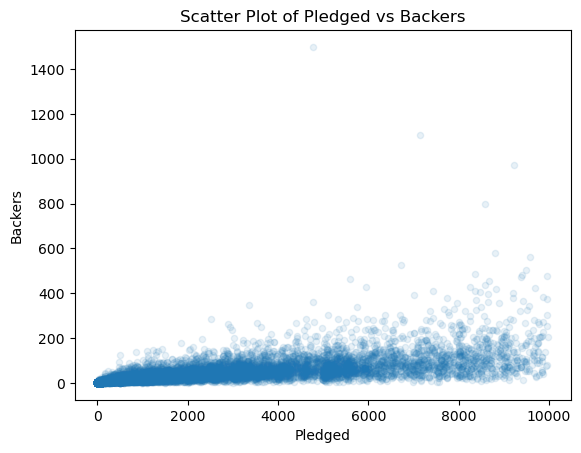

In [69]:
# On peut vérifier cette relation également graphiquement.
# 
# (d) Exécuter la cellule suivante.

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data where pledged is less than 10000 and plot
df[df['pledged'] < 10000].plot(kind='scatter', x='pledged', y='backers', alpha=0.1)
plt.title('Scatter Plot of Pledged vs Backers')
plt.xlabel('Pledged')
plt.ylabel('Backers')
plt.show()

La matrice de corrélation déjà implémentée dans python renvoie un dataframe contenant les coefficients de corrélation de pearson entre chaque variable quantitative et les autres.

Elle est facilement calculable à l'aide de la méthode corr.

(e) Afficher la matrice de corrélation de df.

(f) Que pouvez-dire des corrélations entre pledged et goal ? Entre backers et goal ?

In [72]:
# Filter out only numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Display the result
print(correlation_matrix)

             goal   pledged   backers
goal     1.000000  0.018234  0.010125
pledged  0.018234  1.000000  0.772863
backers  0.010125  0.772863  1.000000


VARIABLES QUALITATIVES

Lorsque les variables sont qualitatives, un test de corrélation de Pearson n'est alors pas adapté. Pour cela, on commence par utiliser la table de contingence. On appelle une table de contingence, la table croisée contenant les différentes catégories des deux variables en question.

Pour afficher une table de contingence, il faut utiliser la fonction crosstab avec les deux variables en argument.

  Exemple d'utilisation : pandas.crosstab(var1,var2)

Cette table de contingence permet de visualiser comment se distribuent les catégories de la variable 1 au sein de la variable 2. Pour des variables totalement indépendantes, la distribution doit être proportionnelle entre chaque ligne et entre chaque colonne.

(a) Afficher la table de contingence de main_category par rapport à state.

In [75]:
table = pd.crosstab(df['main_category'], df['state'])
table

state          failed  successful
main_category                    
Art               881         735
Comics            250         373
Crafts            356         142
Dance              82         126
Design            883         613
Fashion           853         340
Film & Video     1938        1458
Food              969         379
Games            1035         824
Journalism        190          54
Music            1208        1322
Photography       415         197
Publishing       1390         700
Technology       1274         430
Theater           210         373

Le test qu'on effectue alors est un test du χ2 par table de contingence.
Pour chaque case d'un tableau, il effectue un test du χ2 (test de proportions) entre l'effectif de la case et l'effectif total de la colonne.
La statistique de test est alors obtenue en faisant la somme de toutes ces statistiques.

Pour ce test, on pose comme hypothèse nulle :

H0 : "les variables main_category et state sont indépendantes"

Ce test peut s'effectuer tout simplement grâce à la fonction chi2_contingency de scipy appliquée à la table de contingence.
Elle renvoie un array de 4 éléments : la statistique du test, la p-value, le degré de liberté et la liste des fréquences attendues. Pour rejeter l'hypothèse nulle, il est nécessaire que la p-value soit inférieure à 5%.

Vous trouverez le test plus détaillé ici.

(b) Importer la fonction chi2_contingency.

(c) Réaliser le test du χ2 sur la table de contingence déterminée précédemment.

(d) Afficher la statistique du test, la p-value et le degré de liberté.

(e) Les variables sont-elles indépendantes ?

In [76]:
from scipy.stats import chi2_contingency
statistique, pvalue, dof, liste_freq = chi2_contingency(table)
print("Statistique", statistique, "pvalue", pvalue, "dof", dof, "liste des freq", liste_freq)

Statistique 893.4442516445133 pvalue 1.0959666774863444e-181 dof 14 liste des freq [[ 964.2672  651.7328]
 [ 371.7441  251.2559]
 [ 297.1566  200.8434]
 [ 124.1136   83.8864]
 [ 892.6632  603.3368]
 [ 711.8631  481.1369]
 [2026.3932 1369.6068]
 [ 804.3516  543.6484]
 [1109.2653  749.7347]
 [ 145.5948   98.4052]
 [1509.651  1020.349 ]
 [ 365.1804  246.8196]
 [1247.103   842.897 ]
 [1016.7768  687.2232]
 [ 347.8761  235.1239]]


Comme pour les variables quantitatives, on peut mesurer le niveau de corrélation entre deux variables qualitatives. Pour cela, on utilise le V de Cramer corrigé pour contrer le biais qui utilise les résultats du test du χ2. Il renvoie une valeur entre 0 et 1.

où :

χ2 est la statistique du test du χ2.

N est le nombre d'observations du jeu de données.

k est le nombre de lignes du tableau de contingence.

r est le nombre de colonnes du tableau de contingence.

On peut récapituler le test du χ2 sous forme de tableau :

Test	p-value	Décision	Quantifieur
Test du khi2	< 5%	On rejette H0	V de Cramer
(f) Définir une fonction V_Cramer qui prend en argument un tableau de contingence, le nombre d'observations et renvoie la valeur du V de Cramer. Voir la définition du V de Cramer corrigé pour le biais ici

(g) Appliquer V_cramer à table avec le nombre d'observations égale à df.shape[0].

In [77]:
def V_Cramer(table, N):
    stat_chi2 = chi2_contingency(table)[0]
    k = table.shape[0]
    r = table.shape[1]
    phi = max(0,(stat_chi2/N)-((k-1)*(r-1)/(N-1)))
    k_corr = k - (np.square(k-1)/(N-1))
    r_corr = r - (np.square(r-1)/(N-1))
    return np.sqrt(phi/min(k_corr - 1,r_corr - 1))

V_Cramer(table, df.shape[0])

np.float64(0.2097006829012187)

3. Variables Quantitatives et Qualitatives
Une dernière étape consiste à étudier les relations entre variables quantitatives et qualitatives.

Dans ce but, on utilisera l'analyse de la variance (ANOVA) à un facteur qui permet de comparer les moyennes d'échantillon. L'objectif de ce test est de conclure sur l'influence d'une variable explicative catégorielle sur la loi d'une variable continue à expliquer.

Considérons la variable catégorielle main_category et la variable numérique pledge. main_category compte 15 modalités différentes. On définit les moyennes μ₁, μ₂, ..., μ₁₅ qui correspondent à la moyenne des sommes collectées (pledged) pour chacune des 15 modalités. Le raisonnement simple que l'on fait avec ANOVA est que si la variable main_category n'a pas d'incidence sur pledged, la moyenne devrait être identique pour les 15 modalités soient μ₁ = μ₂ = ... = μ₁₅.

On définit donc l'hypothèse nulle :

H0 : μ₁ = μ₂ = ... = μ₁₅

Dans la pratique la méthode ANOVA s'intéresse à la variation interclasse, intraclasse et à la variation totale notées respectivement SCE, SCR et SCT.

Il est connu que cette statistique suit une loi de Fisher de paramètre (k-1, n-k). En s'appuyant sur la valeur de cette statistique et de la p-value associé, on peut conclure sur l'influence ou non de la variable main_category sur la variable pledged.

On rejette H0 si la p-value est inférieure à 5%. Rejeter H0 signifie ici rejeter l'hypothèse selon laquelle main_category n'influe pas sur pledged.

On peut effectuer une analyse de la variance (ANOVA) à un facteur via le module statsmodels et visualiser la p-value et la statistique de Fisher dans un DataFrame.

(a) Importer le module statsmodels.api.

(b) Via l'utilisation d'ANOVA étudier la relation entre pledged et main_category.

(c) Afficher les résultats, observer la p_value (PR>F) et conclure.

Exemple d'utilisation : result = statsmodels.formula.api.ols('var_num ~ var_cat', data = df).fit() table = statsmodels.api.stats.anova_lm(result)

In [78]:
import statsmodels.api

result = statsmodels.formula.api.ols('pledged ~ main_category', data=df).fit()
table = statsmodels.api.stats.anova_lm(result)

table

df        sum_sq       mean_sq          F        PR(>F)
main_category     14.0  2.100400e+12  1.500286e+11  12.438162  1.385892e-29
Residual       19985.0  2.410582e+14  1.206196e+10        NaN           NaN

L'EDA en Low Code

In [79]:
!pip install ydata-profiling
!pip install --upgrade typing-extensions


     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     --------------------------------- ------ 51.2/60.8 kB ? eta -:--:--
     --------------------------------- ------ 51.2/60.8 kB ? eta -:--:--
     -------------------------------------- 60.8/60.8 kB 464.3 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/390.9 kB ? eta -:--:--
   ------ --------------------------------- 61.4/390.9 kB 1.7 MB/s eta 0:00:01
   ----------- ---------------------------- 112.6/390.9 kB 1.3 MB/s eta 0:00:01
   ----------- ---------------------------- 112.6/390.9 kB 1.3 MB/s eta 0:00:01
   ----------- ---------------------------- 112.6/390.9 kB 1.3 MB/s eta 0:00:01
   ------------- ------------------------ 143.4/390.9 kB 708.1 kB/s eta 0:00:01
   ------------------ ------------------- 194.6/390.9 kB 737.3 kB/s eta 0:00:01
   ---------------------- --------------- 235.5/39

In [82]:
from ydata_profiling import ProfileReport


In [83]:
profile = ProfileReport(df, title="Report Kickstarter")

The above is achieved by simply displaying the report as a set of widgets. In a Jupyter Notebook, run:

In [84]:
profile 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [85]:
profile.to_widgets()

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [86]:
profile.to_notebook_iframe()

In [87]:
profile.to_file("Report Kickstarter.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [88]:
from google.colab import files

ModuleNotFoundError: No module named 'google'